# Проверка гипотез для увеличения выручки интернет-магазина с помощью A/B-теста

## Описание проекта
**Контекст**

Отдел маркетинга интернет-магазина подготовил список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тесты, проанализировать результаты тестов и сделать выводы о целесообразности реализации данных гипотез в контексте увеличения выручки.

**Описание данных:**

**Данные для приоритезации гипотез** 

Файл /datasets/hypothesis.csv
+ Hypothesis — краткое описание гипотезы;
+ Reach — охват пользователей по 10-балльной шкале;
+ Impact — влияние на пользователей по 10-балльной шкале;
+ Confidence — уверенность в гипотезе по 10-балльной шкале;
+ Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


**Данные A/B-теста**

Файл /datasets/orders.csv
+ transactionId — идентификатор заказа;
+ visitorId — идентификатор пользователя, совершившего заказ;
+ date — дата, когда был совершён заказ;
+ revenue — выручка заказа;
+ group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv
+ date — дата;
+ group — группа A/B-теста;
+ visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоритизация гипотез

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Приоретизируем гипотезы.

Импортируем библиотеки и прочитаем все файлы. Приведем названия всех колонок к нижнему регистру. Выведем общую информацию о файле hypothesis. Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats as st
import warnings

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = orders.columns.str.lower()
visitors.columns = visitors.columns.str.lower()

hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [3]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.


$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$


In [4]:
hypothesis['rice'] = hypothesis['ice']*hypothesis['reach']
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


Как видим, как только мы приняли во внимание охват, приоретизация гипотез значительно изменилась.

Выведем топ-3 гипотезы по каждому фреймворку. Напомним, чем отличается расчет фреймворков ICE и RICE:

$$ICE = \frac{Impact * Confidence}{Efforts}$$ 

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

таким образом:

$$RICE = Rearch * ICE$$

In [5]:
pd.options.display.max_colwidth = 120
print ('\033[4m\033[1m' + 'Приоритезация по ICE' + '\033[0m')
display(hypothesis.sort_values(by='ice', ascending=False).head(3))
print()
print()
print ('\033[4m\033[1m' + 'Приоритезация по RICE' + '\033[0m')
display(hypothesis.sort_values(by='rice', ascending=False).head(3))

Приоритезация по ICE


,hypothesis,reach,impact,confidence,efforts,ice,rice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0




Приоритезация по RICE


,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0


Как видим, топ-3 частично пересекаются, при этом если по фреймворку ICE у них относительно небольшой разрыв в приоритете, то по фреймворку RICE разрыв более серьезный. Выясним, как отличаются по приоритету остальные гипотезы при использовании разных фреймворков, для наглядности используем **slope graph** - отсортированные в соответствии с приоритетом по фреймворку гипотезы соединим линиями, чтобы было проще оценить изменения.

In [6]:
hypothesis = hypothesis.sort_values(by='ice', ascending=False)
hypothesis['ice_score'] = np.arange(len(hypothesis))
hypothesis = hypothesis.sort_values(by='rice', ascending=False)
hypothesis['rice_score'] = np.arange(len(hypothesis))
hypothesis

,hypothesis,reach,impact,confidence,efforts,ice,rice,ice_score,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0,2,0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0,4,1
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0,1,2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0,3,3
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2,0,4
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0,7,5
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0,5,6
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0,6,7
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0,8,8


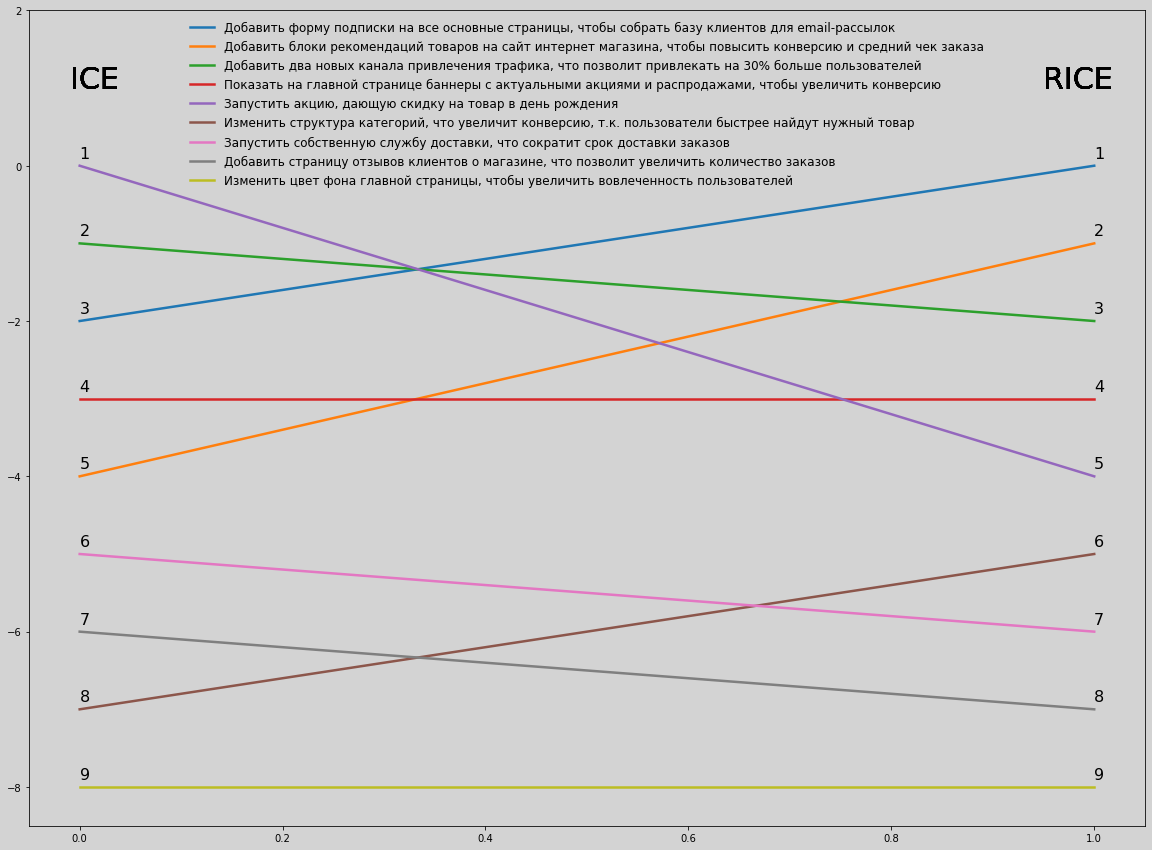

In [7]:
fig, ax = plt.subplots(1, figsize=(20,15),facecolor='lightgrey')
ax.set_facecolor('lightgrey')
for i in hypothesis['hypothesis']:
    plt.plot([0,1], [-hypothesis.loc[hypothesis['hypothesis']==i,'ice_score'], -hypothesis.loc[hypothesis['hypothesis']==i,'rice_score']],  lw=2.5)
    plt.text( 0,-hypothesis.loc[hypothesis['hypothesis']==i,'ice_score']+0.1, 
             int(hypothesis.loc[hypothesis['hypothesis']==i,'ice_score'])+1, size=16)
    plt.text( 1,-hypothesis.loc[hypothesis['hypothesis']==i,'rice_score']+0.1, 
             int(hypothesis.loc[hypothesis['hypothesis']==i,'rice_score'])+1, size=16)
    plt.text( -0.01, 1, 'ICE', size=30)
    plt.text( 0.95, 1, 'RICE', size=30)
    
plt.legend(hypothesis['hypothesis'], loc='upper center',frameon=False, prop={'size': 12})
plt.ylim(-8.5,2)
plt.show()


## Анализ A/B-теста
Изучим таблицы с результатами А/В-теста

In [8]:
print ('\033[4m\033[1m' + 'Orders' + '\033[0m')
display(orders.head(2))
display(orders.info())
print ('\033[4m\033[1m' + 'Visitors' + '\033[0m')
display(visitors.head(2))
display(visitors.info())

Orders


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1197 non-null int64
visitorid        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

Visitors


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Приведем столбцы с датами к необходимому типу

In [9]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим данные на дубликаты

In [10]:
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

Проверим, нет ли пользователей, которые попали в обе группы.

In [11]:
visitors_A = orders[orders['group']=='A']
visitors_B = orders[orders['group']=='B']
double_visitors = visitors_A[visitors_A['visitorid'].isin(visitors_B['visitorid'])]
len(double_visitors)

89

Как видим, есть достаточно много пользователей, которые попали в обе группы. Правильно будет исключить их из выборки.

In [12]:
orders_filtered = orders[~orders['visitorid'].isin(double_visitors)]

### Построим график кумулятивной выручки по группам. 

Создадим таблицу с уникальными значениями дат и групп теста, затем получим кумулятивные данные о заказах и посетителях по дням.

In [13]:
dates_groups = orders[['date','group']].drop_duplicates()
orders_agg = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitors_agg = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим таблицы по дате и группе, переименуем столбцы

In [14]:
cumulative_data = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Построим графики кумулятивной выручки по дням и группам A/B-тестирования

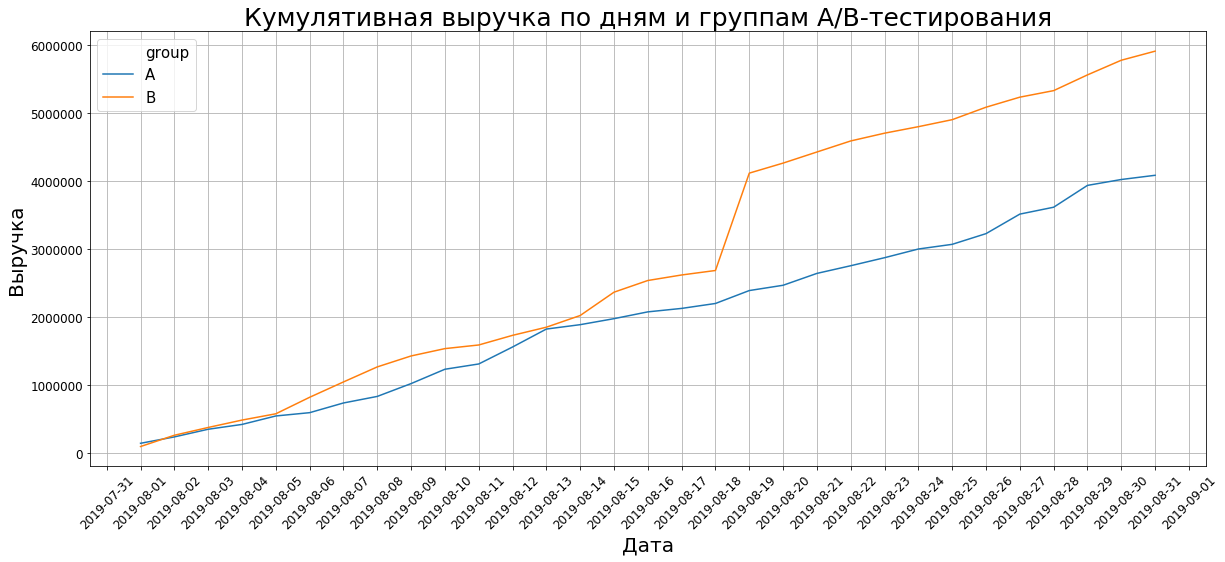

In [15]:
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=[20,8])
ax=sns.lineplot(data=cumulative_data, x='date', y='revenue', hue='group')
ax.axes.set_title('Кумулятивная выручка по дням и группам A/B-тестирования',fontsize=25)
ax.set_xlabel('Дата',fontsize=20)
ax.set_ylabel('Выручка',fontsize=20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) # Ставим более частые "тикеры"
ax.tick_params(labelsize=12)
plt.xticks(rotation=45)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.legend(loc=2, prop={'size': 15})
plt.show()

Как мы видим выручка равномерно накапливается с каждым днем в обеих группах, однако в группе В наблюдается резкий скачок, что может говорить о резком росте числа заказов, либо о появлении очень большого заказа.

### Построим график кумулятивного среднего чека по группам

Найдем средний чек и построим график.

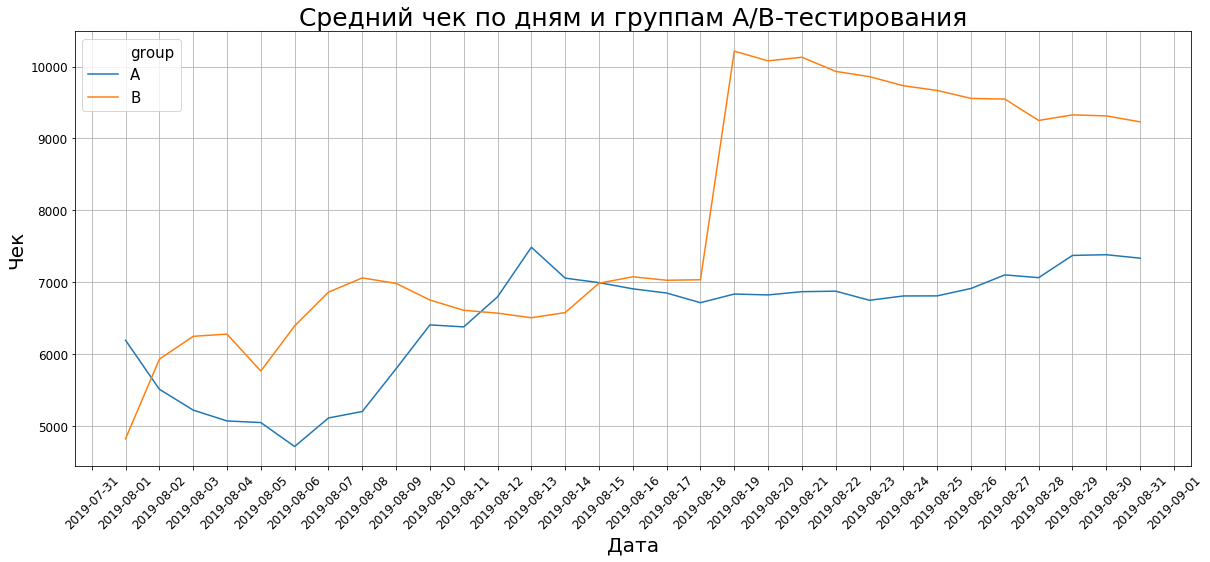

In [16]:
cumulative_data['avg_revenue'] = cumulative_data['revenue'] / cumulative_data['orders']

plt.figure(figsize=[20,8])
ax=sns.lineplot(data=cumulative_data, x='date', y='avg_revenue', hue='group')
ax.axes.set_title('Средний чек по дням и группам A/B-тестирования',fontsize=25)
ax.set_xlabel('Дата',fontsize=20)
ax.set_ylabel('Чек',fontsize=20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) # Ставим более частые "тикеры"
ax.tick_params(labelsize=12)
plt.xticks(rotation=45)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.legend(loc=2, prop={'size': 15})
plt.show()

Наблюдаем резкий скачок для группы В в ту же дату, очевидно речь идет о крупном заказе. В целом же, изменения среднего чека к концу теста становятся более плавными. В конце теста куммулятивный средний чек группы В снижается, видимо из-за попадания туда ранее аномально большого заказа.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

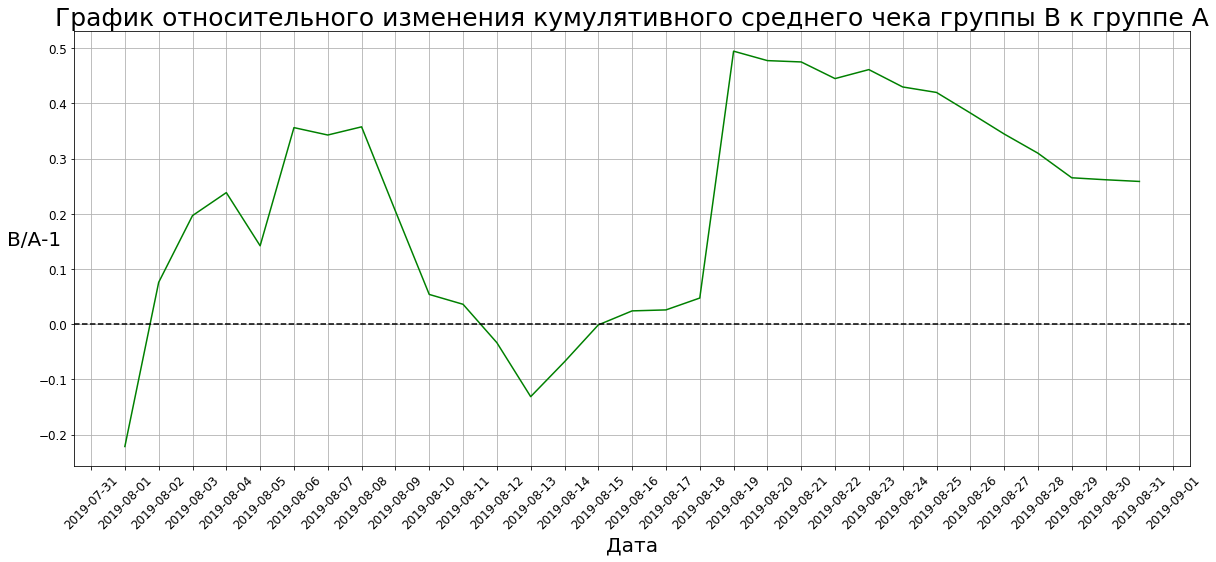

In [17]:
# сгруппируем данные по дате, средний чек представим в отдельных колонках по группе
pivot_revenue = cumulative_data.pivot_table(index='date', columns='group', values='avg_revenue')
# найдем отношение кумулятивных метрик двух групп минус единица для построения графика
pivot_revenue['b_to_a'] = pivot_revenue['B'] / pivot_revenue['A'] - 1

plt.figure(figsize=[20,8])
ax=sns.lineplot(data=pivot_revenue, x=pivot_revenue.index, y='b_to_a', color='green')
ax.axes.set_title('График относительного изменения кумулятивного среднего чека группы B к группе A',fontsize=25)
ax.set_xlabel('Дата',fontsize=20)
ax.set_ylabel('B/A-1',fontsize=20, rotation=0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) # Ставим более частые "тикеры"
ax.tick_params(labelsize=12)
plt.xticks(rotation=45)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

График различия между группами скачкообразно меняется, по нему нельзя сделать однозначных выводов, судя по резким изменениям графика присутствуют аномльные значения.

### Построим график кумулятивной конверсии по группам.

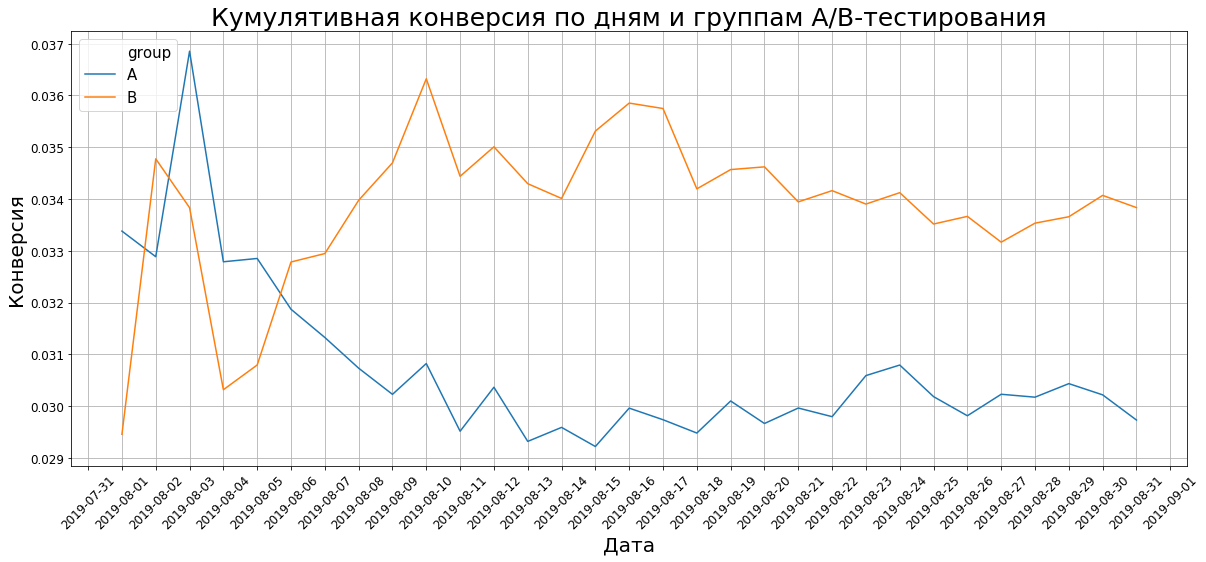

In [18]:
# найдем конверсию
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

plt.figure(figsize=[20,8])
ax=sns.lineplot(data=cumulative_data, x='date', y='conversion', hue='group')
ax.axes.set_title('Кумулятивная конверсия по дням и группам A/B-тестирования',fontsize=25)
ax.set_xlabel('Дата',fontsize=20)
ax.set_ylabel('Конверсия',fontsize=20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) # Ставим более частые "тикеры"
ax.tick_params(labelsize=12)
plt.xticks(rotation=45)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.legend(loc=2, prop={'size': 15})
plt.show()

Конверсия группы A сильно проседает в те же даты, в которые сильно растет конверсия группы В, нет ли тут взаимосвязи? Даже к концу теста конверсии не установились, но при этом конверсия группы В стабильно лучше конверсии группы А.

### Построим график относительного изменения кумулятивной конверсии группы B к группе A

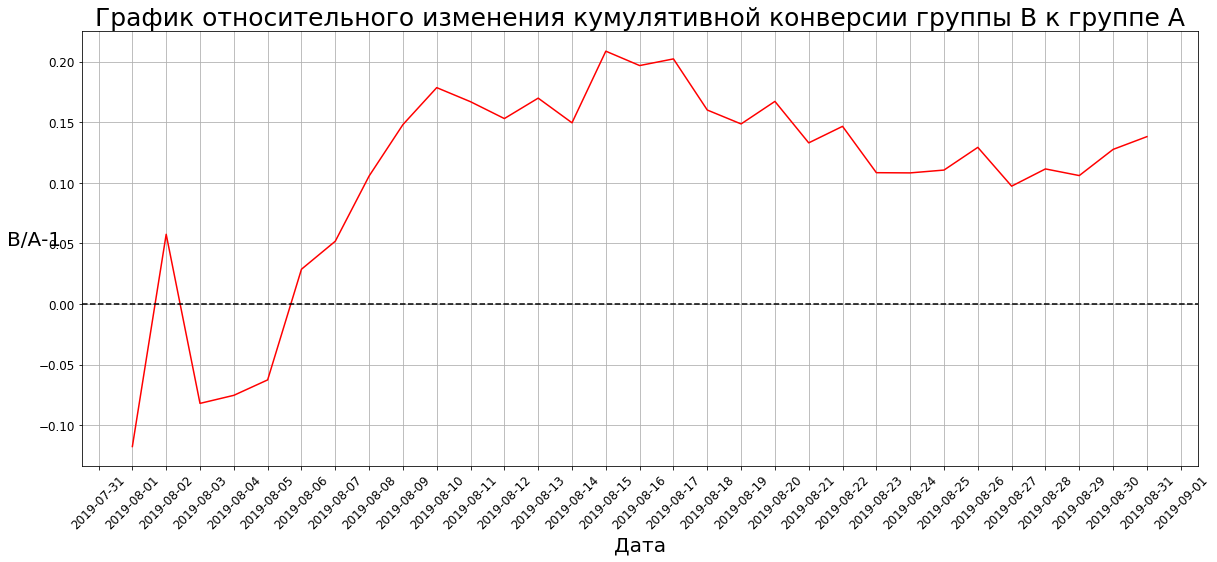

In [19]:
# сгруппируем данные по дате, конверсию представим в отдельных колонках по группе
pivot_conversion = cumulative_data.pivot_table(index='date', columns='group', values='conversion')
# найдем отношение кумулятивных метрик двух групп минус единица для построения графика
pivot_conversion['b_to_a'] = pivot_conversion['B'] / pivot_conversion['A'] - 1

plt.figure(figsize=[20,8])
ax=sns.lineplot(data=pivot_conversion, x=pivot_conversion.index, y='b_to_a', color='red')
ax.axes.set_title('График относительного изменения кумулятивной конверсии группы B к группе A',fontsize=25)
ax.set_xlabel('Дата',fontsize=20)
ax.set_ylabel('B/A-1',fontsize=20, rotation=0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) # Ставим более частые "тикеры"
ax.tick_params(labelsize=12)
plt.xticks(rotation=45)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

В начале теста конверсия группы В проигрывала группе А, после резкого скачка и падения, конверсия группы В выросла относительно группы А, и хотя отношение конверсий еще не установилось, нет предпосылок, что конверсия группы В станет меньше конверсии группы А.

### Построим точечный график количества заказов по пользователям

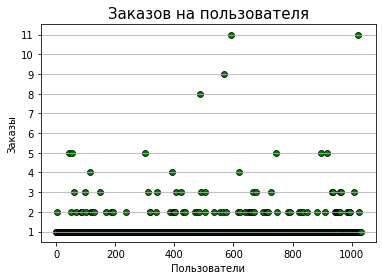

In [20]:
# узнаем количество заказов на пользователя, сгруппировав данные по пользователям
orders_by_visitors = orders.groupby('visitorid', as_index=False).agg({'transactionid': pd.Series.nunique})
# создадим ряд для оси х длинной в количество пользователей
x_values = pd.Series(range(0,len(orders_by_visitors)))

ax=sns.scatterplot(data=orders_by_visitors, x=x_values, y=orders_by_visitors['transactionid'], color='green', edgecolor='k' )
ax.axes.set_title('Заказов на пользователя',fontsize=15)
ax.set_xlabel('Пользователи',fontsize=10)
ax.set_ylabel('Заказы',fontsize=10)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.grid(True)
plt.show()

Подавляющее большинство пользователей сделало по одному заказу, при этом есть пользователи и с 2-3 заказами, и оценить их долю по данному графику не представляется возможным.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей

In [21]:
print('Не более 5% пользователей сделали {:.0f} заказа и более, не более 1% пользователей сделали {:.0f} заказа и более.'
      .format(np.percentile(orders_by_visitors['transactionid'], [95, 99])[0], np.percentile(orders_by_visitors['transactionid'], [95, 99])[1]))

Не более 5% пользователей сделали 2 заказа и более, не более 1% пользователей сделали 4 заказа и более.


Выберем 2 заказа как верхнюю границу для неаномальных пользователей.

### Построим точечный график стоимостей заказов

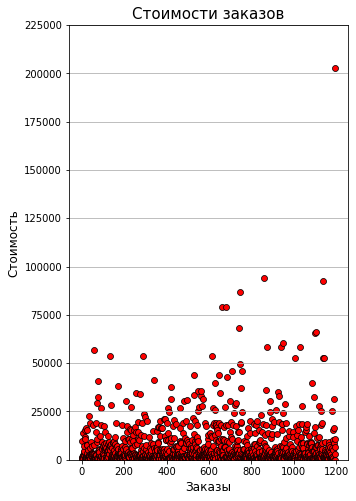

In [22]:
x_values_rev = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=[5,8])
ax=sns.scatterplot(data=orders, x=x_values_rev, y=orders['revenue'], color='red', edgecolor='k' )
ax.axes.set_title('Стоимости заказов',fontsize=15)
ax.set_xlabel('Заказы',fontsize=12)
ax.set_ylabel('Стоимость',fontsize=12)
ax.yaxis.set_major_locator(ticker.MultipleLocator(25000))
ax.yaxis.grid(True)
plt.ylim([0, 225000])
plt.show()

Наблюдаем основное число заказов в пределах 25000, так же присутствуют и более дорогие заказы. Определить границу аномальных значений нам помогут перцентили.

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [23]:
print('Не более 5% заказов совершено на сумму больше {:.0f}, и не более 1% заказов совершено на сумму больше {:.0f}.'
      .format(np.percentile(orders['revenue'], [95, 99])[0], np.percentile(orders['revenue'], [95, 99])[1]))

Не более 5% заказов совершено на сумму больше 28000, и не более 1% заказов совершено на сумму больше 58233.


Выберем сумму 28000 как верхнюю границу для неаномальной стоимости заказа.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

Подготовим данные

In [24]:
    # Пользователей за дату в группе А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
    # Кумулятивное число пользователей  за дату в группе А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
    # Пользователей за дату в группе В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
    # Кумулятивное число пользователей  за дату в группе В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
    # Число заказов и сумма чеков за каждую дату в группе А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
    # Кумулятивное число заказов и сумма чеков за каждую дату в группе А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
    # Число заказов и сумма чеков за каждую дату в группе B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
    # Кумулятивное число заказов и сумма чеков за каждую дату в группе B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Попробуем сделать то же самое другим способом и получить тот же результат.

In [25]:
pivot_visits = visitors.pivot_table(index='date', columns='group', aggfunc={'visitors':'mean'})
pivot_visits.columns = ['visitors_a', 'visitors_b']
pivot_visits['cumm_visitors_a'] = pivot_visits['visitors_a'].cumsum()
pivot_visits['cumm_visitors_b'] = pivot_visits['visitors_b'].cumsum()

pivot_orders = orders.pivot_table(index='date', columns='group', aggfunc={'transactionid': pd.Series.nunique, 'revenue': 'sum'})
pivot_orders.columns = ['revenue_a', 'revenue_b', 'orders_a', 'orders_b']
pivot_orders['cumm_revenue_a'] = pivot_orders['revenue_a'].cumsum()
pivot_orders['cumm_revenue_b'] = pivot_orders['revenue_b'].cumsum()
pivot_orders['cumm_orders_a'] = pivot_orders['orders_a'].cumsum()
pivot_orders['cumm_orders_b'] = pivot_orders['orders_b'].cumsum()

pivot_data = pivot_visits.join(pivot_orders).reset_index()
pivot_data.head()

,date,visitors_a,visitors_b,cumm_visitors_a,cumm_visitors_b,revenue_a,revenue_b,orders_a,orders_b,cumm_revenue_a,cumm_revenue_b,cumm_orders_a,cumm_orders_b
0,2019-08-01,719,713,719,713,148579,101217,24,21,148579,101217,24,21
1,2019-08-02,619,581,1338,1294,93822,165531,20,24,242401,266748,44,45
2,2019-08-03,507,509,1845,1803,112473,114248,24,16,354874,380996,68,61
3,2019-08-04,717,770,2562,2573,70825,108571,16,17,425699,489567,84,78
4,2019-08-05,756,707,3318,3280,124218,92428,25,23,549917,581995,109,101


Проверим гипотезу о различии в конверсии между группами:
+ **Нулевая гипотеза** состоит в том, что статистически значимых различий в конверсии между группами нет
+ **Альтернативня гипотеза** состоит в том, что конверсия группы А и группы В статистически отличается

Критический уровень статистической значимости:  $\alpha=0.05$

In [26]:
alpha = 0.05

# Число заказов для каждого пользователя группы A
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']
# Число заказов для каждого пользователя группы В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']
# Добавляем в конец списка столько нулей, на сколько отличается сумма всех посетителей группы 
# от числа пользователей, сделавших заказ
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                pivot_data['visitors_a'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                pivot_data['visitors_a'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

p_value=stats.mannwhitneyu(sampleA, sampleB)[1]
print('p-value={0:.3f}'.format(p_value))
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между конверсиями групп есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в конверсии между группами нет'
    ) 

print('Конверсия группы B выше относительно конверсии группы А на {0:.3%}'.format(sampleB.mean() / sampleA.mean() - 1))


p-value=0.005
Отвергаем нулевую гипотезу: между конверсиями групп есть значимая разница
Конверсия группы B выше относительно конверсии группы А на 14.901%


Если рассматривать неочищенные данные, конверсия группы В значимо выше конверсии группы А. Необходимо посчитать статистическую значимость между конверсиями на очищенных даных.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Проверим гипотезу о различии в конверсии между группами:
+ **Нулевая гипотеза** состоит в том, что статистически значимых различий в среднем чеке между группами нет
+ **Альтернативня гипотеза** состоит в том, что средний чек группы А и группы В статистически отличается

Критический уровень статистической значимости:  $\alpha=0.05$

In [27]:
alpha = 0.05

p_value=stats.mannwhitneyu(pivot_data['revenue_a'] , pivot_data['revenue_b'], alternative='two-sided')[1]
print('p-value={0:.3f}'.format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между средним чеком групп есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в среднем чеке между группами нет'
    ) 

print('Средний чек группы B выше относительно среднего чека группы А на {0:.3%}'.format(
    orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean() - 1))


p-value=0.086
Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в среднем чеке между группами нет
Средний чек группы B выше относительно среднего чека группы А на 25.871%


### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

Напомним, мы принимаем за аномальных пользователей тех, кто совершил свыше 2 заказов или совершил заказ дороже 28000. Узнаем, сколько всего аномальных пользователей в выборке.

In [28]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print('В выборке',len(abnormalUsers),'аномальных пользователя.')

В выборке 74 аномальных пользователя.


Сформируем отфильтрованные массивы данных и применим к ним статистический критерий Манна-Уитни. 

In [29]:
# Выбираем из числа заказов для каждого пользователя только неаномальных пользователей.
# Добавляем в конец списка столько нулей, на сколько отличается сумма всех посетителей группы 
# от числа пользователей, сделавших заказ
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                pivot_data['visitors_a'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                pivot_data['visitors_b'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

alpha = 0.05

p_value=stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1]

print('p-value={0:.3f}'.format(p_value))
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между конверсиями групп есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в конверсии между группами нет'
    ) 

print('Конверсия группы B выше относительно конверсии группы А на {0:.3%}'.format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))



p-value=0.013
Отвергаем нулевую гипотезу: между конверсиями групп есть значимая разница
Конверсия группы B выше относительно конверсии группы А на 17.270%


Результаты по конверсии подтвердились на очищенных данных, разница в относительной конверсии стала еще больше.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [30]:
alpha = 0.05

p_value = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        alternative='two-sided')[1]

print('p-value={0:.3f}'.format(p_value))
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между средним чеком групп есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в среднем чеке между группами нет'
    ) 

print('Средний чек группы B выше относительно среднего чека группы А на {0:.3%}'.format(
   orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
        )
     )

p-value=0.738
Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в среднем чеке между группами нет
Средний чек группы B выше относительно среднего чека группы А на -1.962%


Результаты по среднему чеку не подтвердились на очищенных данных, статистически значимых различий в среднем чеке между группами нет.

## Вывод

По результатам анализа выяснили:

+ статистически значимых различий в среднем чеке между группами нет;
+ конверсия группы В лучше конверсии группы А, и хотя конверсии до конца не установились, нет предпосылок, что ситуация изменится

**Представляется целесообразным прекратить тест и зафиксировать победу группы В**